In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Purpose of this Notebook:** This is an example _project report_ created from a notebook. 

Such a notebook follow these guidelines:
* all computational heavy lifting is done in `run.py`. This notebook should only read in tables and figures.
* Almost no code is used in the notebook.
* The notebook will usually be converted to `html` or `pdf` in `run.py`. The narrative is written in markdown, while the figure and tables are imported from files which are generated by library code.
* Parameterize as much of the results as you can as dynamically generated content -- that way you can update the data and rerun the results easily!

# Introduction

By July 2020, Android OS is still a leading mobile operating system that holds 74.6% of market share worldwide, attracting numerous crazy cyber-criminals who are targeting at the largest crowd.¹ Also, due to its open-resource feature and flexible system updating policy, it is 50 times more likely to get infected compared to ios systems.² Thus, developing a strong malware detection system becomes the number one priority.

The current state of malware(malicious software) detection for the growing android OS application market involves looking solely at the API(Application Programming Interface) calls. API is a set of programming instructions that allow outside parties or individuals to access the platform or the application.³ A good and daily example will be the login options displaying on the app interface like “Login with Twitter”.4 Malwares can collect personal information easily from APIs, so analyzing APIs is a critical part of identifying malwares.

Hindroid formulates a meta-path based approach to highlight relationships across API calls to aggregate similarities and better detect malware.5 Individual APIs appearing in the ransomware could be harmless, but the combination of them could indicate “this ransomware intends to write malicious code into system kernel.”5 You wouldn’t want to see a group of “write”, “printStackTrace”, and “load” APIs appearing in your app’s smali file.5


## Analysis of the Data

### Data Generating Process and Relation to Problem

We want to detect malware in the apps to protect users from being harmed by the hacker. So, ...
What is malware? 
In Hindroid, malwares are malicious software that “deliberately fulfills the harmful intent to the smartphone users.”5 Due to the lack of trustworthy malware detection methods, developers can sneak their malware in the app easily and then upload it to the market easily.

Why do we need the source code for detecting it? 
Softwares(including malware) is built by code. Thus, to hack others’ phones, the malware authors have to put the code of their malware into the apps’ source code. Thus, if we detect that something is wrong with the source code, we know the code must have included the malware in it. Thus, we can tell if the app is malware or not.

Are there any other ways that we can detect malware without the source code?
Look for the signs of malware after downloading it. (Not recommended. You will probably be harmed before you notice the signs)


### Observed Data

The data for identifying malware is primarily the android play store, although in order to obtain the respective APK’s for these apps the data is directly downloaded from `https://apkpure.com/`.

This data is then unpackaged using the apktools library that allows us to view the subsequent smali code and app binaries.

The smali code and app binaries contain a lot of the information derived from the Java source code that allows us to map the number of API calls and the relationships between them. 

**The data(the source code) we collected for our project is from real apps** written by the original author of the app, no matter if the app is benign or is a malware. Real data gives us the opportunity to process the data without any bias. Intentional apps, the apps people write for testing purposes only, could have biased code in it itself, and we cannot achieve great results when we are analyzing the real-word apps with the methods we trained by the intentional data.

**Our data is not representative enough,** since we only include 9 apps, and the benign apps are mostly popular apps in the market. The data we collected for now is not big enough to make an accurate prediction and conclusion. Nevertheless, we will be able to collect more data and analyze them to achieve an accurate result.



### Methods

**Introduction:**
Overall, from each android app, what’s most relevant to classifying Malware vs Benign - are the API calls, code blocks(methods) and packages these API calls occur in, classified as matrices 
A, P, B, I. This form of organizing data explains the relationship between these API calls. It provides a story, more in depth, than just the sheer number of API calls per app. 

The Hindroid model observes the same relationship of data to better classify malware or not, through the relationship of the above defined matrices. Reducing the ability of apps to just add a larger number of API calls to get classified as benign. 
 
**Steps:**

    1. Once the data was loaded in from `https://apkpure.com/` and compiled into smali code, every single API call was extracted and stores by its invoke type using the python regex library

    2. The API call types were stored in a n-dimensional array with more information about the package types and the code blocks. 

    3. Once the data was pre-processed and stored in an accessible format. This was then loaded into a jupyter notebook environment on a docker image to explore the distribution and nuances of the data. 

    4. All of the plots for exploration and visualization were made from derived pandas dataframes using its inbuilt plotting capabilities. 

    5. The baseline model was then created using scikit-learn classification/ensemble libraries. 


### EDA

The primary purpose of the EDA was to observe the distribution of API calls, across all the Android applications of both benign and malware categories. 

Here, we observe the distribution of all API calls per app -


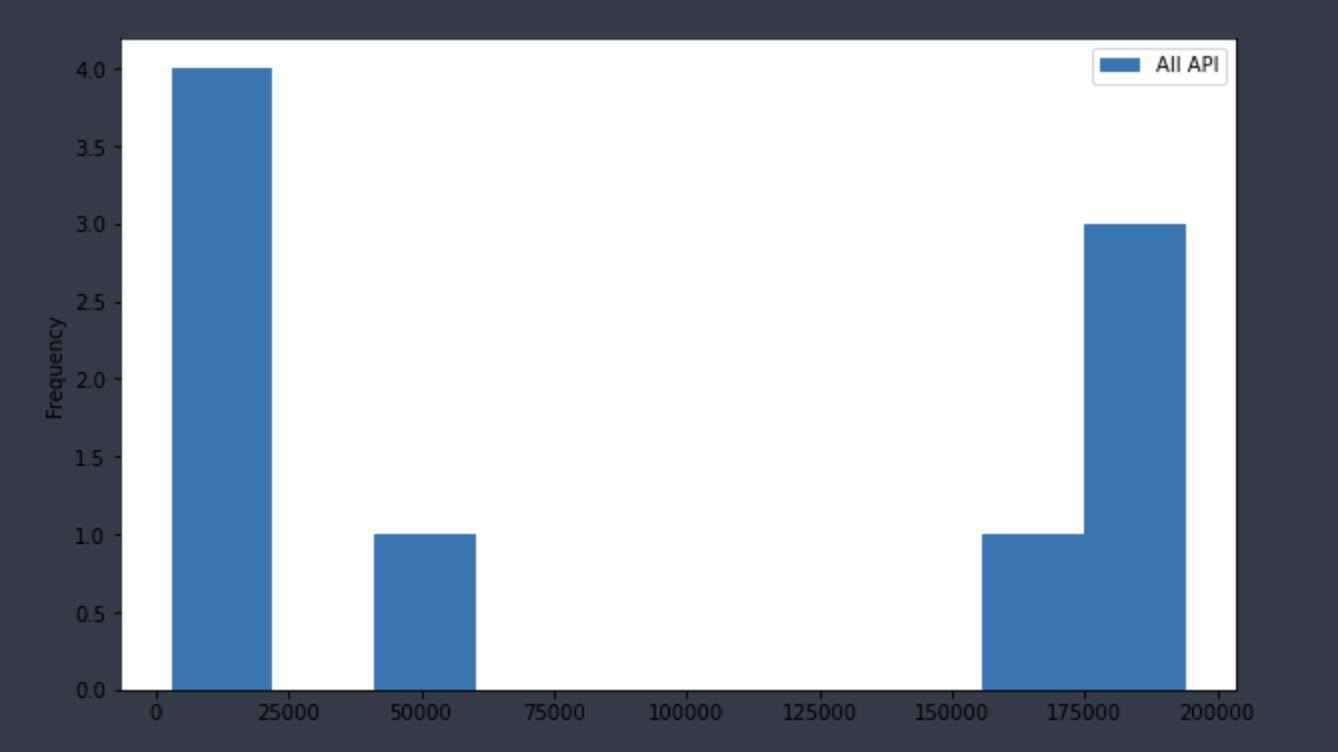

In the graph above we see a large gap in the plot, where we see a distinction in group with a range of count of API calls. These are distinctly grouped by the smaller number API calls being Malware apps, while the larger numbers are mostly Benign applications. 

Overall, we saw that there were 1,073,602 API calls across in the ‘random-apps’ dataset with both Malware and Benign applications. These API calls can be further explored by the nature of how they are invoked. There are primarily 4 types of API calls that can be invoked - 
    
    1. Invoke-Direct
    2. Invoke-Static
    3. Invoke-Virtual
    4. Invoke-Super
    5. Invoke-Interface
All these API calls have different applications and are varied in number through the application types. 
We see, through the 2 categories of apps that the number of times each API call is invoked is distinct. 

##### Here, we see the distribution of API calls for malware applications - **

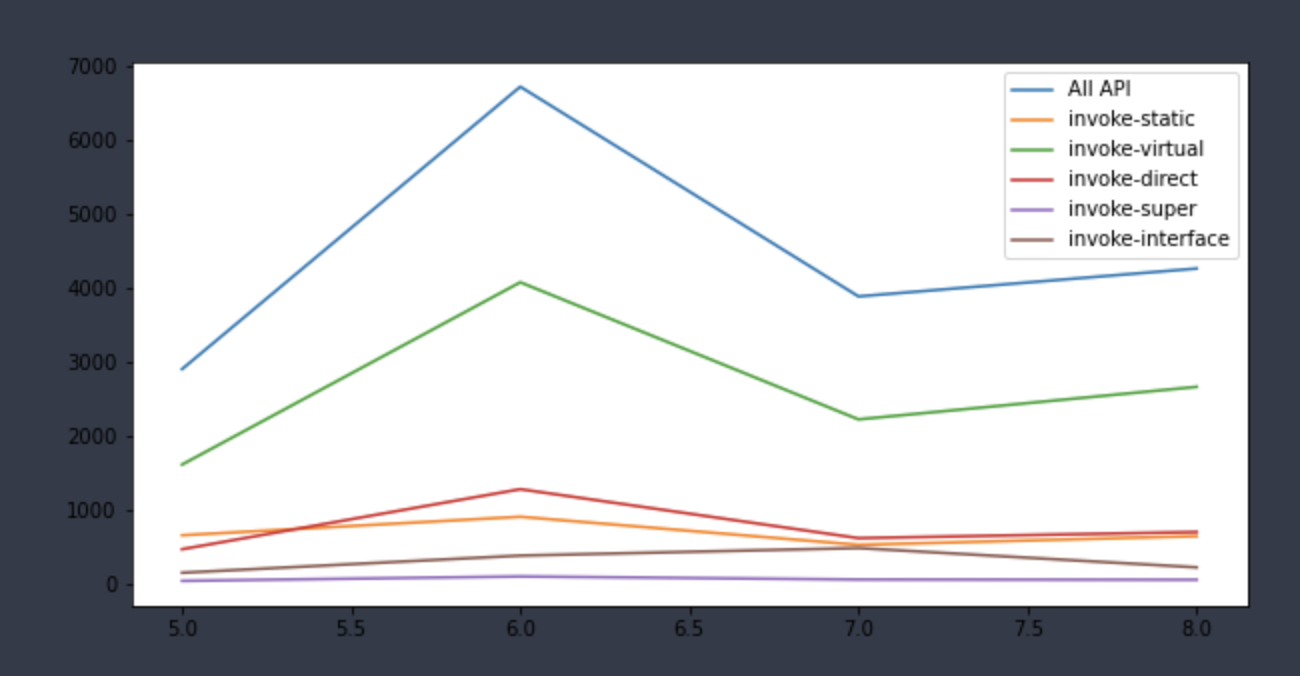

##### The distribution of API calls for benign Applications - 

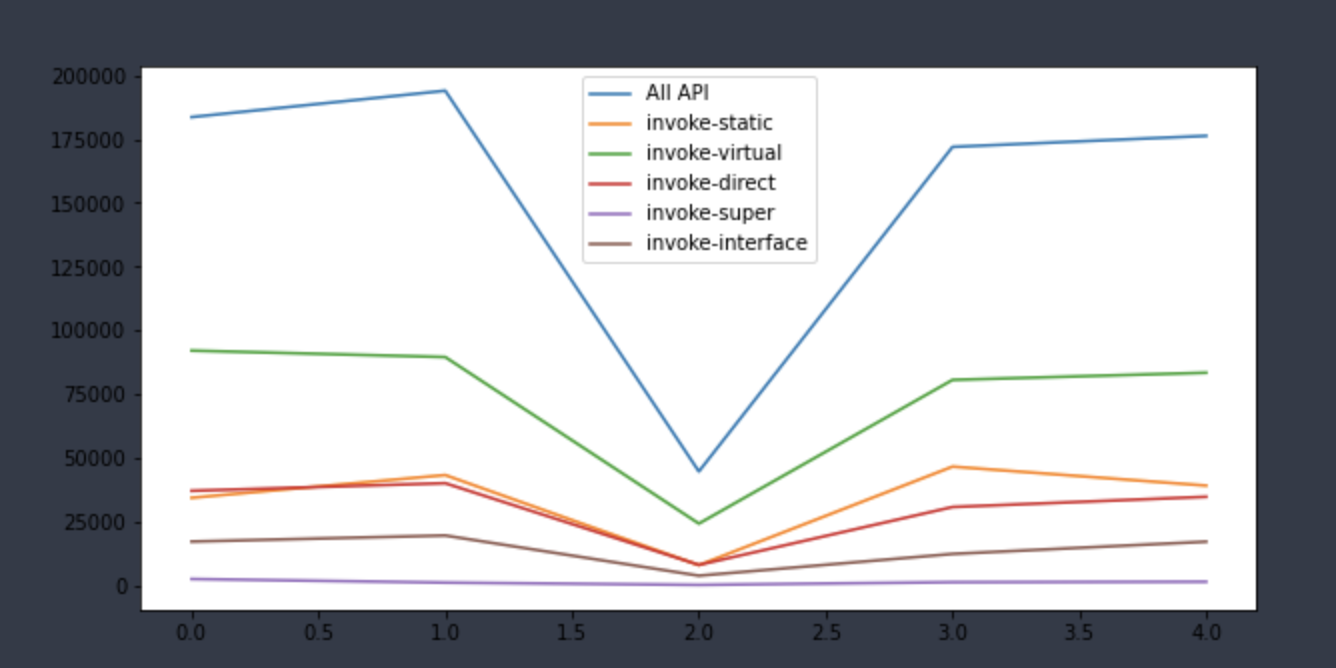

These two plots show us that the ‘invoke-virtual’ API invoke method is the most frequent, across both malware and benign apps. Conversely, we also see that the ‘invoke-super’ API calls are the least frequent, again here, uniform across both categories. 

The distribution of counts of API calls were further explored in relation to their specific invoke calls. Ljava/lang/Object was the most frequent API call across all applications. 


The API call types and counts were used to create naive features for a baseline model. This baseline model is primarily to compare the end output of the research to a naive accuracy and approach. For this, we used the RandomForest and GradientBoosting Classifier. While accuracy isn’t the ideal metric for this dataset, it served as a great foundation for comparison. 


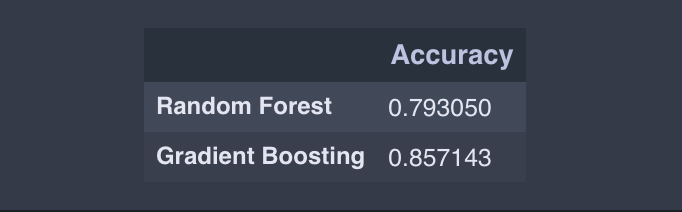

### Top-10 Frequently Used Apis in Benign Apps and Malwares(Test Apps)

**Summary:**

Since using Apis is one of the major approach for malware to steal personal information, like: address, phone number, credit card number and password, we want to see the difference among the top-10 most used Apis in both benign apps and malware. 


**Methods:**
So we extracted all the apis from both kinds of apps, made a count to each unique apis occurred in the apps. We pick the top 10 Apis for both benign apps and malwares and made them into bar plots to magnify the differences.


(malware)

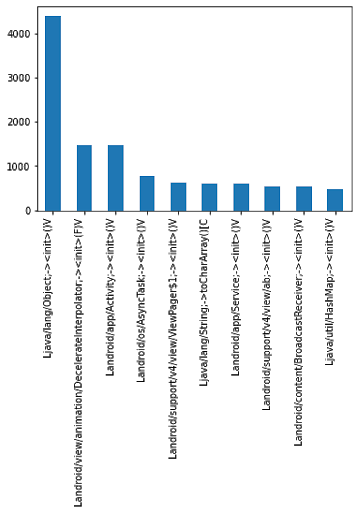

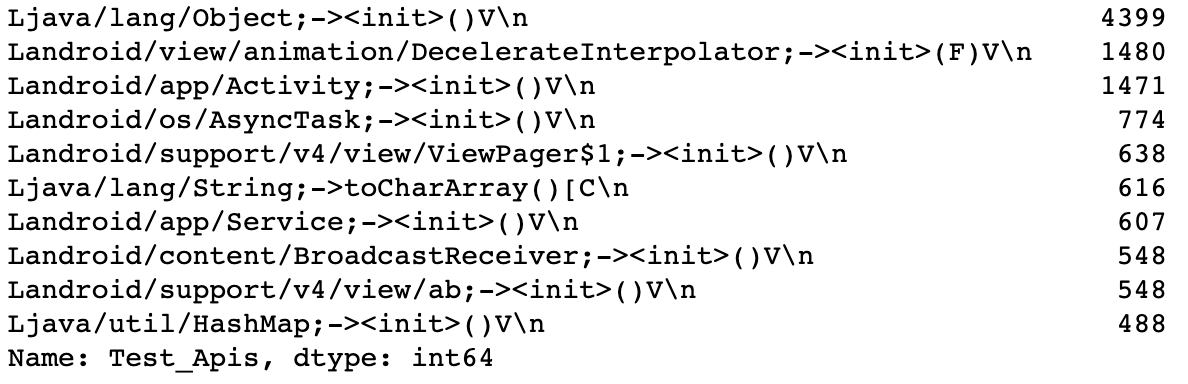

(Benign Apps)

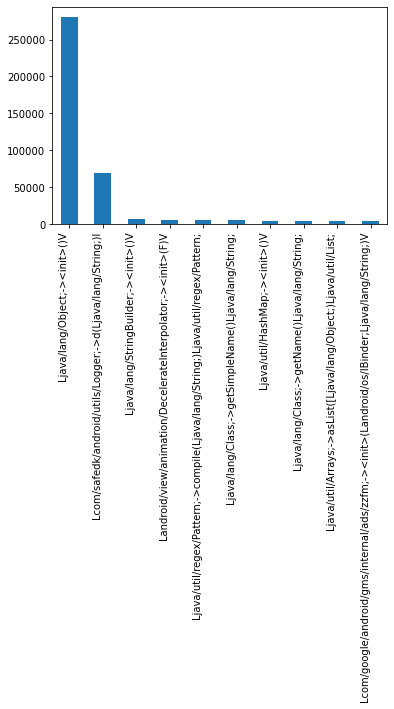

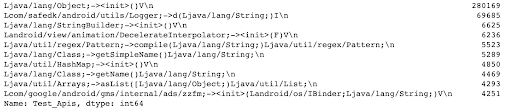

From the graph we can see the difference among the most frequently used Apis in both the benign apps and the malwares. We can further analyze from here if certain Apis are designed for malware from here.

### Conclusion

The process of identifying the relationship of API calls, is taking the idea of the subsequent network it creates - thus to not just look at the information queried by the call but also the way it interacts with other API’s in different levels of the codebase. The applicability of this lies beyond that of malware detection in android apps, but probably in the roots of graph theory and how relationships with API calls can be better identified and mapped out to provide more insight


### Citation

1. O'Dea, Published by S., and Aug 17. “Mobile OS Market Share 2019.” Statista, 17 Aug. 2020, www.statista.com/statistics/272698/global-market-share-held-by-mobile-operating-systems-since-2009/. 
2. Panda Security Panda Security specializes in the development of endpoint security products and is part of the WatchGuard portfolio of IT security solutions. Initially focused on the development of antivirus software. “Android Devices 50 Times More Infected Compared to IOS - Panda Security.” Panda Security Mediacenter, 14 Jan. 2019, www.pandasecurity.com/en/mediacenter/mobile-security/android-more-infected-than-ios/
3. App-press.com. 2020. What Is An API And SDK? - App Press. [online] Available at: <https://www.app-press.com/blog/what-is-an-api-and-sdk#:~:text=API%20%3D%20Application%20Programming%20Interface,usually%20packaged%20in%20an%20SDK.> [Accessed 31 October 2020].
4. “5 Examples of APIs We Use in Our Everyday Lives: Nordic APIs |.” Nordic APIs, 10 Dec. 2019, nordicapis.com/5-examples-of-apis-we-use-in-our-everyday-lives/. 
5. Shifu Hou, Yanfang Ye ∗ , Yangqiu Song, and Melih Abdulhayoglu. 2017. HinDroid: An Intelligent Android Malware Detection System Based on Structured Heterogeneous Information Network. In Proceedings of KDD’17, August 13-17, 2017, Halifax, NS, Canada, , 9 pages. DOI: 10.1145/3097983.3098026
